In [1]:
import nbimporter
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

from torchvision import transforms
import os


import python_file.dataclass as StreetSign
import python_file.function as Function
import python_file.network as Network

from python_file.dirPath import modelliDir, imageDir, dayTest, fogTest


In [2]:
model = Network.MiniAlexNetV2()
model.load_state_dict(torch.load(modelliDir / 'minialexnetV2_dataset-200.pth'))
model.eval()

MiniAlexNetV2(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ReLU()
    (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1,

In [3]:
model1 = Network.MiniAlexNet()
model1.load_state_dict(torch.load(modelliDir / 'minialexnet_dataset-200.pth'))
model1.eval()

MiniAlexNet(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): ReLU()
  )
  (classifier): Sequential(
    (0): Linear(in_features=4096, out_features=2048, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2048, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=4

In [4]:
model2 = Network.LeNetColor()
model2.load_state_dict(torch.load(modelliDir / 'lenet_dataset-200.pth'))
model2.eval()

LeNetColor(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 18, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(18, 28, kernel_size=(5, 5), stride=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
  )
  (classifier): Sequential(
    (0): Linear(in_features=700, out_features=360, bias=True)
    (1): ReLU()
    (2): Linear(in_features=360, out_features=252, bias=True)
    (3): ReLU()
    (4): Linear(in_features=252, out_features=100, bias=True)
  )
)

Per  testare la nostra rete possiamo usare le immagini presenti nella cartella "DITS-full\DITS-full\DITS-detection\class\image\", che sono numerate da 1 a 1356. 
Oppure si può usare una qualsiasi immagine presa da internet come nell'esempio in cui si utilizzerà l'immagine "image\image.jpeg"

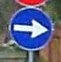

In [5]:
img = Image.open(imageDir / "180.png")
img


In [6]:
transform = transforms.Compose([transforms.Resize(32),transforms.ToTensor()])
img_t = transform(img)

In [7]:
input_height = 32
input_width = 32

mean = 0.6529
std = 0.3422

preprocess = transforms.Compose([
    transforms.Resize((input_height, input_width)),
    transforms.ToTensor(),  # Converte l'immagine in un tensore PyTorch
    #transforms.Normalize(mean, std),
])

img_t = preprocess(img)  # Ora img_tensor è un tensore PyTorch valido

# Assicurati che img_tensor sia 4D (batch_size, canali, altezza, larghezza)
img_t = img_t.unsqueeze(0)  # Aggiunge una dimensione di batch

# Seleziona solo i primi 3 canali (RGB)
img_t = img_t[:, :3, :, :]

In [8]:
output = model(img_t).detach().numpy().argmax()
print("MinialexnetV2",output)
if (output == 0):
    print("\n\nIl risultato della MiniAlexNetV2 è Indicazione")

elif (output == 1):
    print("\n\nIl risultato della MiniAlexNetV2 è Divieto")
    
elif (output == 2):
    print("\n\nIl risultato della MiniAlexNetV2 è Pericolo")
    
else:
    print("ERROR 404 NOT FOUND")

MinialexnetV2 1


Il risultato della MiniAlexNetV2 è Divieto


In [9]:
output = model1(img_t).detach().numpy().argmax()
print("Minialexnet",output)
if (output == 0):
    print("\n\nIl risultato della Minialexnet è Indicazione")

elif (output == 1):
    print("\n\nIl risultato della Minialexnet è Divieto")
    
elif (output == 2):
    print("\n\nIl risultato della Minialexnet è Pericolo")
    
else:
    print("ERROR 404 NOT FOUND")

Minialexnet 1


Il risultato della Minialexnet è Divieto


In [10]:
output = model2(img_t).detach().numpy().argmax()
print("LeNet",output)
if (output == 0):
    print("\n\nIl risultato della LeNet è Indicazione")

elif (output == 1):
    print("\n\nIl risultato della LeNet è Divieto")
    
elif (output == 2):
    print("\n\nIl risultato della LeNet è Pericolo")
    
else:
    print("ERROR 404 NOT FOUND")

LeNet 1


Il risultato della LeNet è Divieto


<h1>Nuova FASE</h1>
Si progetta uina parte di codice per verificare che data un'immagine standard si riesca a trovare i segnali all'interno di essa

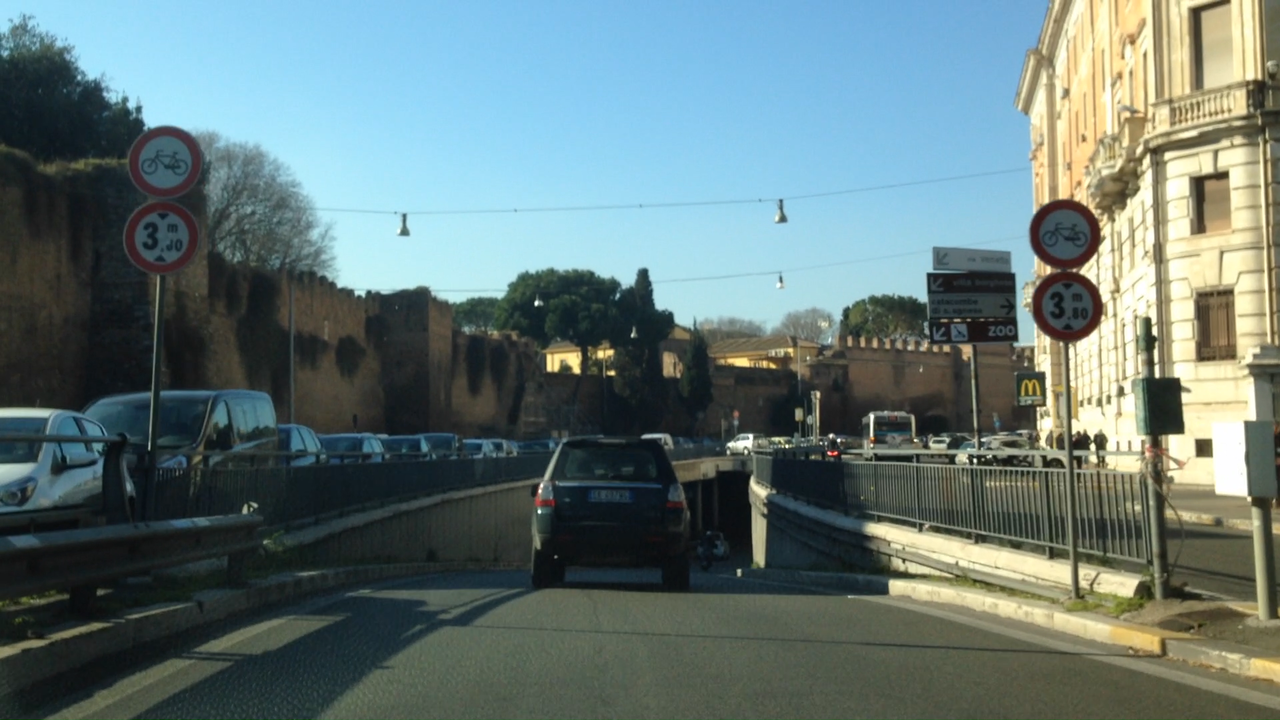

In [21]:
target_img = '60.png'
img = Image.open(dayTest / target_img)
img

Segnale in (114,110)-(214,210): Predetto=Background, Reale=Divieto
Segnale in (111,190)-(211,290): Predetto=Divieto, Reale=Divieto
Segnale in (1016,178)-(1116,278): Predetto=Divieto, Reale=Divieto
Segnale in (1014,255)-(1114,355): Predetto=Divieto, Reale=Divieto


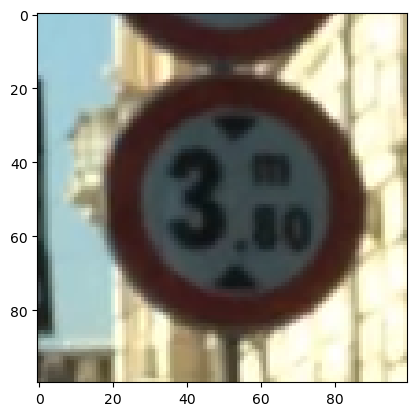

In [22]:
from PIL import Image
from torchvision import transforms
from python_file.dirPath import dayTest
import python_file.network as Network
import torch

classi = {0: "Indicazione", 1: "Divieto", 2: "Pericolo", 3: "Background"}

# Leggi le annotazioni
with open(dayTest / 'prova.txt') as f:
    annotations = [line.strip().split() for line in f.readlines()]

# Per una specifica immagine (es. 0.png)
#target_img = '0.png'
#img = Image.open(dayTest / target_img)

for ann in annotations:
    if ann[0] == target_img:
        x1, y1, x2, y2 = int(ann[1]), int(ann[2]), int(ann[3]), int(ann[4])
        true_class = int(ann[5])
        
        # Ritaglia il segnale dall'immagine full-size
        crop = img.crop((x1, y1, x2, y2))
        
        # Visualizza il crop
        plt.imshow(crop)
        
        tensor = preprocess(crop).unsqueeze(0)[:, :3, :, :]
        
        with torch.no_grad():
            output = model(tensor)
            pred = output.argmax(dim=1).item()
        
        print(f"Segnale in ({x1},{y1})-({x2},{y2}): "
              f"Predetto={classi[pred]}, Reale={classi[true_class]}")

In [23]:

preprocess = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

classi = {0: "Indicazione", 1: "Divieto", 2: "Pericolo", 3: "Background"}

# Carica un'immagine full-size dal test
w, h = img.size

# Sliding window a diverse scale
results = []
for scale in [64, 96, 128, 160]:
    step = scale // 2  # overlap del 50%
    for y in range(0, h - scale, step):
        for x in range(0, w - scale, step):
            crop = img.crop((x, y, x + scale, y + scale))
            tensor = preprocess(crop).unsqueeze(0)[:, :3, :, :]
            
            with torch.no_grad():
                output = model(tensor)
                prob = torch.softmax(output, dim=1)
                conf, pred = prob.max(1)
            
            if pred.item() != 3 and conf.item() > 0.999:  # soglia di confidenza
                results.append((x, y, x+scale, y+scale, classi[pred.item()], conf.item()))

from torchvision.ops import nms

if len(results) > 0:
    boxes_tensor = torch.tensor([[r[0], r[1], r[2], r[3]] for r in results], dtype=torch.float)
    scores_tensor = torch.tensor([r[5] for r in results], dtype=torch.float)
    
    # NMS: iou_threshold = 0.3 → elimina box che si sovrappongono per più del 30%
    keep = nms(boxes_tensor, scores_tensor, iou_threshold=0.3)
    
    results_clean = [results[i] for i in keep.tolist()]
    print(f"Prima di NMS: {len(results)} — Dopo NMS: {len(results_clean)}")
    for r in results_clean:
        print(f"  [{r[4]}] ({r[0]},{r[1]})-({r[2]},{r[3]}) conf={r[5]:.3f}")

Prima di NMS: 12 — Dopo NMS: 7
  [Pericolo] (1008,144)-(1104,240) conf=1.000
  [Divieto] (1088,320)-(1216,448) conf=1.000
  [Pericolo] (1008,384)-(1104,480) conf=1.000
  [Pericolo] (1152,256)-(1216,320) conf=1.000
  [Divieto] (864,544)-(928,608) conf=1.000
  [Indicazione] (720,432)-(816,528) conf=1.000
  [Indicazione] (960,192)-(1088,320) conf=1.000


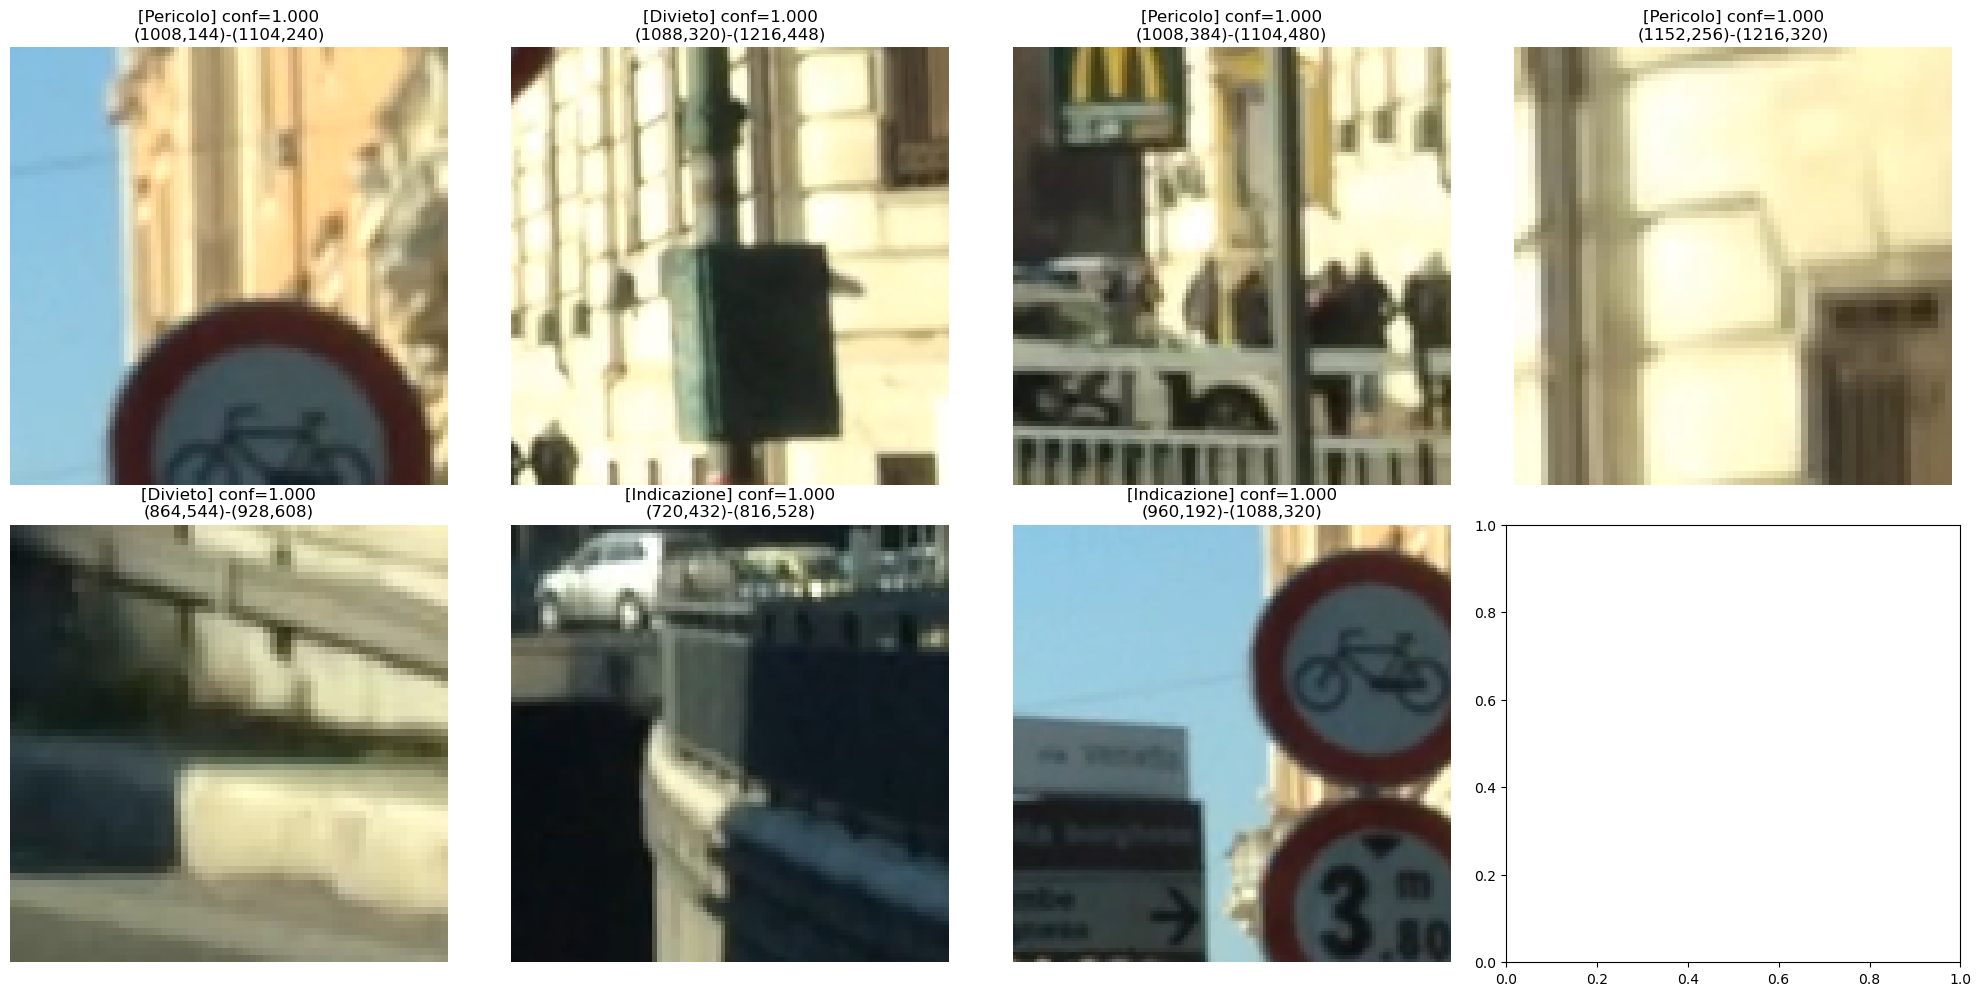

In [24]:
if len(results_clean) > 0:
    fig, axes = plt.subplots(2, len(results_clean)//2 + 1, figsize=(20, 10))
    axes = axes.flatten()
    
    for i, r in enumerate(results_clean):
        crop = img.crop((r[0], r[1], r[2], r[3]))
        
        # Visualizza il crop
        axes[i].imshow(crop)
        axes[i].set_title(f"[{r[4]}] conf={r[5]:.3f}\n({r[0]},{r[1]})-({r[2]},{r[3]})")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()